## Simple Chatbot

In [1]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
from langchain_huggingface import HuggingFaceEndpoint, ChatHuggingFace
from langchain_core.messages import BaseMessage, HumanMessage
from typing import TypedDict, Annotated
from dotenv import load_dotenv
import operator
import os

load_dotenv()

True

In [ ]:
llm = HuggingFaceEndpoint(
    repo_id="openai/gpt-oss-20b",
    task="task-generation",
    huggingfacehub_api_token=os.getenv("HUGGINGFACEHUB_API_TOKEN")
)

llm = ChatHuggingFace(llm=llm)


/mnt/d/Academics/Generative AI by CampusX/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]

In [5]:
def chat_node(state: ChatState):

    # taske user query from state 
    message = state['messages']

    # send to llm
    response = llm.invoke(message)

    # response store 
    return {'messages': [response]}

In [6]:
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

# add node
graph.add_node('chat_node', chat_node)

# add edges
graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

chatbot = graph.compile(checkpointer=checkpointer)

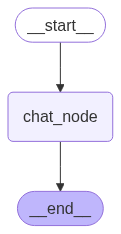

In [7]:
chatbot

In [8]:
# Executation
thread_id = "1"
config = {'configurable': {'thread_id': thread_id}}

initial_state = {
    'messages': [HumanMessage(content="What is effect of AI on India")]
}
# result = chatbot.invoke(initial_state)
result = chatbot.invoke(initial_state, config=config)
# result = chatbot.invoke(initial_state)['messages'][-1].content

In [9]:
result

{'messages': [HumanMessage(content='What is effect of AI on India', additional_kwargs={}, response_metadata={}, id='2ffdc097-c543-40c6-ad5e-608a8bc41336'),
  AIMessage(content='**Artificial Intelligence – India\'s “Double‑Edged Sword”**\n\n| Sector | What AI is doing | The catch / challenge |\n|--------|-----------------|------------------------|\n| **Economy** | • Drives the country’s **AI‑led “Digital” GDP** – predicted to add ~₹4.4\u202ftrillion ($52\u202fbillion) by 2025.  <br>• Fuels a burgeoning **AI startup ecosystem** (80k+ startups, 30+ unicorns).  <br>• Powers **FinTech** (fraud detection, credit scoring, underwriting). | • Need for deep‑tech talent, data skills, and high‑bandwidth infrastructure.  <br>• Intellectual property & cross‑border partnership concerns. |\n| **Agriculture** | • Precision farming via satellite‑based crop monitoring, weather‑prediction, drone imagery. <br>• AI chatbots (e.g., “AgriBot”) give farmers timely advisories. | • Farmers must trust & adopt new

In [10]:
thread_id = '1'

while True:
    user_message = input('Type here: ...')
    print("User: ", user_message)

    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break

    config = {'configurable': {'thread_id': thread_id}}
    response = chatbot.invoke({'messages': [HumanMessage(content=user_message)]}, config=config)
    print("AI: ", response['messages'][-1].content)

User:  hi
AI:  Hey there! 👋 How can I help you today?
User:  quit


In [11]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='What is effect of AI on India', additional_kwargs={}, response_metadata={}, id='2ffdc097-c543-40c6-ad5e-608a8bc41336'), AIMessage(content='**Artificial Intelligence – India\'s “Double‑Edged Sword”**\n\n| Sector | What AI is doing | The catch / challenge |\n|--------|-----------------|------------------------|\n| **Economy** | • Drives the country’s **AI‑led “Digital” GDP** – predicted to add ~₹4.4\u202ftrillion ($52\u202fbillion) by 2025.  <br>• Fuels a burgeoning **AI startup ecosystem** (80k+ startups, 30+ unicorns).  <br>• Powers **FinTech** (fraud detection, credit scoring, underwriting). | • Need for deep‑tech talent, data skills, and high‑bandwidth infrastructure.  <br>• Intellectual property & cross‑border partnership concerns. |\n| **Agriculture** | • Precision farming via satellite‑based crop monitoring, weather‑prediction, drone imagery. <br>• AI chatbots (e.g., “AgriBot”) give farmers timely advisories. | • Farmers mus